[Datasets](https://www.kaggle.com/paultimothymooney/breast-histopathology-images/)

El cáncer de mama es una enfermedad maligna que se desarrolla en las células del tejido mamario. Es una de las formas más comunes de cáncer que afecta a las mujeres en todo el mundo. La detección temprana es crucial para un tratamiento efectivo y mejores resultados para los pacientes.


El uso de algoritmos de Machine Learning (ML) para la detección de cáncer de mama a través de imágenes médicas, como mamografías o imágenes por resonancia magnética (IRM), se ha convertido en un área de investigación muy interesante.

Los algoritmos de ML pueden entrenarse con conjuntos de datos que contienen imágenes médicas etiquetadas, lo que les permite aprender a reconocer características distintivas asociadas con el cáncer de mama.

Una vez entrenados, estos algoritmos pueden ser utilizados para analizar nuevas imágenes y proporcionar diagnósticos o detecciones preliminares que pueden ayudar a los profesionales de la salud a tomar decisiones más informadas.


In [3]:
#Como nuestro dataset es súper pesado vamos a leerlo directamente de kaggle por lo que cargamos nuestro token
file_path = '/content/kaggle.json'

In [11]:
import shutil
import os

# Mover el archivo kaggle.json a la carpeta .kaggle
kaggle_dir = 'kaggle.json'
file_path = 'kaggle.json'

if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

shutil.move(file_path, kaggle_dir)
os.chmod(kaggle_dir, 600)


In [13]:
#Descaragr e instalar el paquete kaggle para poder manejar datasets de ahí
pip install kaggle

SyntaxError: invalid syntax (1065607110.py, line 2)

In [14]:
#Descarga del dataset que usare que en este caso es el de: Breast Histopathology Images
kaggle datasets download -d paultimothymooney/breast-histopathology-images

SyntaxError: invalid syntax (3010100749.py, line 2)

In [ ]:
#Descomprimir el archivo que ya jaló mi comando anterior a este entorno
!unzip breast-histopathology-images.zip -d Breast


Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: Breast/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: Breast/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: Breast/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: Breast/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: Breast/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: Breast/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: Breast/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: Breast/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: Breast/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: Breast/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: Breast/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflati

In [18]:
#Importo las librerias necesarias

#Tensrflow para machine learning y redes neuronales
import tensorflow as tf

#Interacción con el sistema operativo
import os

#Cálculos numéricos
import numpy as np

#Estructura de datos y analítica de datos
import pandas as pd

#Visualización | gráficos
import matplotlib.pyplot as plt

#Herramienta para preprocesamiento y manipulación de imágenes
from tensorflow.keras.preprocessing import image

#Generador de datos
from keras.preprocessing.image import ImageDataGenerator

#Importa la métrica de crossentropy para clasificación
from tensorflow.keras.metrics import categorical_crossentropy

#Capas para construcción de red convolucional
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D

#Para creación de modelos de manera secuencial | capa por capa
from keras.models import Sequential, Model

#importación de ADAM que es un algrotimo para entrenamiento de mis redes neuronales
from keras.optimizers import Adam

#Biblioteca de visión por computadora
import cv2

In [19]:
#Utilizaremos como nuestra ruta principal esta carpeta
data = 'Breast/10264'

#Dentro de esta carpeta tenemos dos carpetas '0' indica las imágenes que fueron clasificadas sin cáncer y '1' con cáncer
No_Cancer_Mama = 'Breast/10264/0'
Si_Cancer_Mama = 'Breast/10264/1'

In [20]:
#Este bloque de código en Python está diseñado para generar una lista de rutas de archivo (listaR) y una lista de etiquetas (etiquetas) correspondientes para un conjunto de datos con imágenes de tejido mamario con y sin cáncer.

#Declaración de lista con dos variables (Cáncer o No Cáncer)
dirlist=[No_Cancer_Mama, Si_Cancer_Mama]

#lista con dos etiquetas ('No' y 'Si'), indicando las clases correspondientes a las imágenes. (con o sin cáncer)
clases=['No', 'Si']

listaR=[]
etiquetas=[]

#ciclo que recorre la lista con los archivos y para cada uno se crea la ruta y se va añadiendo a listaR para contar
for i,j in zip(dirlist, clases):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        listaR.append(filepath)
        etiquetas.append(j)
print ('listaR: ', len(listaR), '   etiquetas: ', len(etiquetas))

listaR:  1204    etiquetas:  1204


In [21]:
#Crear un DataFrame usando pandas; Organizar mi lista de archivos (listaR) y sus etiquetas correspondientes (etiquetas).

#Serie que contiene los elementos de listaR
Files = pd.Series(listaR, name='listaR')

#Serie que contiene las etiquetas
Label=pd.Series(etiquetas, name='etiquetas')

#Creacion de un dataframe con 2 columnas fucionando las dos listas de arriba
df=pd.concat([Files,Label], axis=1)

#Ajuste a una matriz de 1204 filas con sus 2 columnas
df=pd.DataFrame(np.array(df).reshape(1204,2), columns = ['listaR', 'etiquetas'])
df.head()

,listaR,etiquetas
0,Breast/10264/0/10264_idx5_x551_y2051_class0.png,No
1,Breast/10264/0/10264_idx5_x1951_y1401_class0.png,No
2,Breast/10264/0/10264_idx5_x2501_y1101_class0.png,No
3,Breast/10264/0/10264_idx5_x2451_y651_class0.png,No
4,Breast/10264/0/10264_idx5_x2651_y1001_class0.png,No


In [22]:
#Muestra el recuento de valores punicos en la columna etiquetas
print(df['etiquetas'].value_counts())

No    617
Si    587
Name: etiquetas, dtype: int64


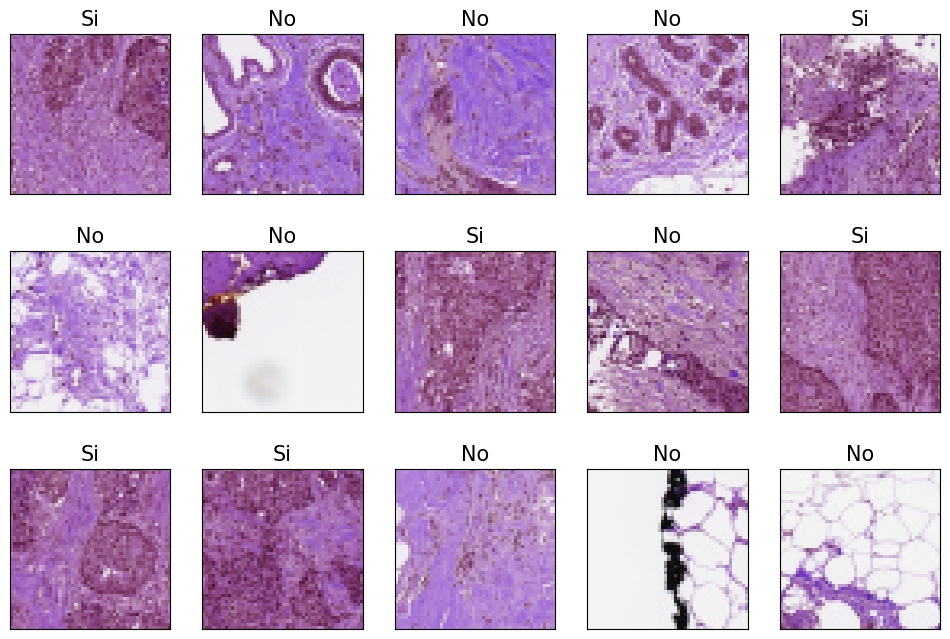

In [23]:
#Visualización de mis imágenes

#Creación de mi figura para mostrar las imágenes 12x8 pulgadas
plt.figure(figsize=(12,8))

#Iteración para mostrar 15 impágenes
for i in range(15):
    #Generación de número aleatorio para mostrar imágenes aleatorias
    random = np.random.randint(1,len(df))
    #3 filas y 5 columnas
    plt.subplot(3,5,i+1)
    #leer y mostrar la imagen
    plt.imshow(cv2.imread(df.loc[random,"listaR"]))
    #titulos
    plt.title(df.loc[random, "etiquetas"], size = 15, color = "black")
    #Ocultar mis ejes
    plt.xticks([])
    plt.yticks([])

plt.show()

In [24]:
#División de mi dataframe en conjuntos de entrenamiento prueba y validación
from sklearn.model_selection import train_test_split

#División de conjunto 95% entrenamiento 5% prueba
train, test = train_test_split(df, train_size=0.95, random_state=0)

#División en conjuntos de entrenamiento y validación 90% entrenamiento 10% validación
train_new, valid = train_test_split(train, train_size=0.90, random_state=0)

print(f"train set shape: {train_new.shape}")
print(f"test set shape: {test.shape}")
print(f"validation set shape: {valid.shape}")

train set shape: (1028, 2)
test set shape: (61, 2)
validation set shape: (115, 2)


In [25]:
#En esta parte vamos a realizar aumentacipon de datos

#Normalizamos los valores de pixeles encontrados en un rango del 0 al 1, rotaremos en 40°, con desplazamientos horizontales y verticales, controlando el sesgo,zoom y el voltear horizontal y verticalmente
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)

#En este caso solo aplicamos la normalización para representar la situación real
test_datagen = ImageDataGenerator(rescale = 1.0/255.)


In [26]:
#Generador de datos,e stbalecemos el tamaño para normalizar la simágenes, definimos el tamaño del lote para entrenar, clasificación binaria y se shufflea para tener aletoriedad
train_gen = train_datagen.flow_from_dataframe(dataframe = train_new,
                                              x_col = 'listaR', y_col ='etiquetas',
                                              target_size = (224,224), batch_size = 32,
                                              class_mode = 'binary', shuffle = True)
#Sólo reducimos el tamaño del lote
val_gen = train_datagen.flow_from_dataframe(valid,
                                            target_size=(224,224), x_col = 'listaR', y_col ='etiquetas',
                                            class_mode='binary',
                                            batch_size= 16, shuffle=True)
#Aquí no shuffleamos para mantener situación real
test_gen = test_datagen.flow_from_dataframe(test,
                                            target_size = (224,224), x_col = 'listaR', y_col ='etiquetas',
                                             class_mode = 'binary',
                                            batch_size = 16, shuffle = False)

Found 1028 validated image filenames belonging to 2 classes.
Found 115 validated image filenames belonging to 2 classes.
Found 61 validated image filenames belonging to 2 classes.


In [27]:
#obtener los índices de las clases presentes en el conjunto de entrenamiento,
train_gen.class_indices

{'No': 0, 'Si': 1}

**Transfer Learning**

In [28]:
from tensorflow import keras

#Usaremos la arquitectura ResNet50V2
base_model = keras.applications.ResNet50V2(
    #Pesos preentrenados
    weights="imagenet",
    #Normalizar nuevamente imágenes para que no haya discrepancia
    input_shape=(224, 224, 3),
    #No incluir las capas más conectadas
    include_top=False,
)

# Bloqeuamso entrenamiento de los pesos
base_model.trainable = False

# Nuevo modelo
inputs = keras.Input(shape=(224, 224, 3))


#Tomamos la salida del modelo base y no se realiza entrenamiento
x = base_model(inputs, training=False)
#Agregamos una capa con el promedio global, reducimos la salida a un vector de features
x = keras.layers.GlobalAveragePooling2D()(x)
#Regularización pro medio de droput apagamos aleatoriamente algunas neuronas
x = keras.layers.Dropout(0.2)(x)

#Salida de clasificación binaria  con una activación sigmoide
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

#Nuevo modelo que agarra inpusts.y porduce ls salidad
model = keras.Model(inputs, outputs)

#Resumen del modelo que se creó
model.summary()

94668760/94668760 [==============================] - 9s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 2049 (8.00

In [29]:
#Guarda el modelo después de cada época si hay una mejora en la métrica.
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("Tumor_Cl_Mdl.h5", save_best_only=True, verbose = 0)
]


#Configura el modelo para el entrenamiento.
#Se elige 'binary_crossentropy' como función de pérdida ya que se trata de un problema de clasificación binaria.
#Se utiliza el optimizador Adam con una tasa de aprendizaje de 0.0001 y se monitorea la métrica de precisión ('accuracy').

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate= 0.0001), metrics=['accuracy'])

#Entrena el modelo con los datos proporcionados por los generadores de datos train_gen y val_gen durante 100 épocas.
#Los callbacks se utilizan para controlar el proceso de entrenamiento.
#verbose=1 muestra mi barrita de progreso durante el entrenamiento.

history = model.fit(train_gen, validation_data = val_gen, epochs = 100,
                    callbacks = [callbacks], verbose = 1)

Epoch 1/100
33/33 [==============================] - 32s 936ms/step - loss: 0.7002 - accuracy: 0.5691 - val_loss: 0.5643 - val_accuracy: 0.6870
Epoch 2/100


/Users/kathbejarano/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 33s 1s/step - loss: 0.6158 - accuracy: 0.6741 - val_loss: 0.5756 - val_accuracy: 0.6957
Epoch 3/100
33/33 [==============================] - 34s 1s/step - loss: 0.5839 - accuracy: 0.7043 - val_loss: 0.5332 - val_accuracy: 0.7391
Epoch 4/100
33/33 [==============================] - 37s 1s/step - loss: 0.5309 - accuracy: 0.7500 - val_loss: 0.5187 - val_accuracy: 0.7478
Epoch 5/100
33/33 [==============================] - 38s 1s/step - loss: 0.4995 - accuracy: 0.7792 - val_loss: 0.4669 - val_accuracy: 0.8435
Epoch 6/100
33/33 [==============================] - 37s 1s/step - loss: 0.4701 - accuracy: 0.7957 - val_loss: 0.4779 - val_accuracy: 0.8348
Epoch 7/100
33/33 [==============================] - 39s 1s/step - loss: 0.4610 - accuracy: 0.7947 - val_loss: 0.4222 - val_accuracy: 0.8435
Epoch 8/100
33/33 [==============================] - 38s 1s/step - loss: 0.4430 - accuracy: 0.8200 - val_loss: 0.4326 - val_accuracy: 0.8348
Epoch 9/100
33/33 [======

In [30]:
model.save("model.h5")#Guardar mi modelo

**Evaluating the model**

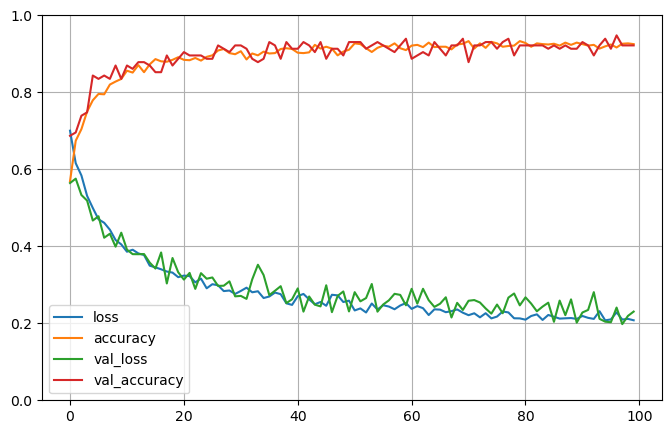

In [31]:
#Graficar el historico del comportamiento de mi entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
from PIL import Image
model_path = "model.h5"
loaded_model = tf.keras.models.load_model(model_path)

# import matplotlib.pyplot as plt
import numpy as np

#Vamos a leer una imagen que venga en el set de datos
image = cv2.imread('Breast/10264/0/10264_idx5_x51_y1751_class0.png')

#Normlizamos y preparamos la imagen
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((224, 224))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
if pred >= 0.5:
  print("Detección de Cáncer")
else:
  print("No se detecta Cáncer")

1/1 [==============================] - 1s 548ms/step
No se detecta Cáncer


In [33]:
train_gen.class_indices

{'No': 0, 'Si': 1}

In [2]:
from PIL import Image
import cv2
import numpy as np
import tensorflow as tf

model_path = "model.h5"
loaded_model = tf.keras.models.load_model(model_path)

while True:
    image_path = input("Introduce la ruta de la imagen (o escribe 'salir' para terminar): ")

    if image_path.lower() == 'salir':
        break  # Salir del bucle si el usuario escribe 'salir'
    
    try:
        image = cv2.imread(image_path)

        if image is None:
            print("No se pudo cargar la imagen. Introduce una ruta válida.")
            continue  # Volver a solicitar la ruta de la imagen si no se puede cargar

        # Normalizar y preparar la imagen
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((224, 224))
        expand_input = np.expand_dims(resize_image, axis=0)
        input_data = np.array(expand_input)
        input_data = input_data / 255

        pred = loaded_model.predict(input_data)
        if pred >= 0.5:
            print("Detección de Cáncer")
        else:
            print("No se detecta Cáncer")

    except Exception as e:
        print("Ocurrió un error:", e)


1/1 [==============================] - 0s 484ms/step
No se detecta Cáncer
1/1 [==============================] - 0s 61ms/step
No se detecta Cáncer
1/1 [==============================] - 0s 54ms/step
No se detecta Cáncer
1/1 [==============================] - 0s 80ms/step
No se detecta Cáncer
1/1 [==============================] - 0s 98ms/step
Detección de Cáncer
1/1 [==============================] - 0s 94ms/step
No se detecta Cáncer
1/1 [==============================] - 0s 95ms/step
Detección de Cáncer
1/1 [==============================] - 0s 86ms/step
Detección de Cáncer
1/1 [==============================] - 0s 61ms/step
Detección de Cáncer
1/1 [==============================] - 0s 54ms/step
Detección de Cáncer
1/1 [==============================] - 0s 58ms/step
Detección de Cáncer
1/1 [==============================] - 0s 56ms/step
No se detecta Cáncer
1/1 [==============================] - 0s 57ms/step
Detección de Cáncer
1/1 [==============================] - 0s 58ms/step
No se